Erstellt Kuchendiagramme für die Präsentation.

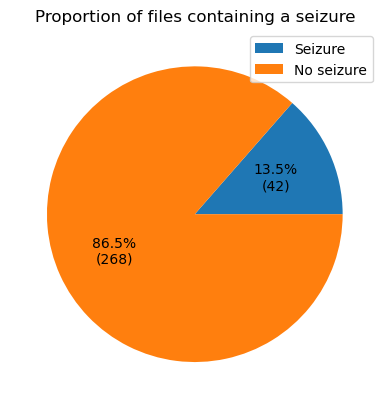

In [11]:
import os
import matplotlib.pyplot as plt

total_patients = set()
seizure_patients = set()

total_files = 0
seizure_files = 0


for root, dirs, files in os.walk('../../../../tuar/edf'):
    for file in files:
        if file.endswith('.edf'):
            total_files += 1
            total_patients.add(file.split('_')[0])
        if file.endswith('_seiz.csv'):
            seizure_files += 1
            seizure_patients.add(file.split('_')[0])

def make_autopct(sizes, pct_threshold=2):
    def autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        if pct > pct_threshold:
            return f'{pct:.1f}%\n({val})'
        else:
            return ''
    return autopct      

sizes = [seizure_files, total_files - seizure_files]

plt.title('Proportion of files containing a seizure')
wedges, _, _ = plt.pie(sizes, autopct=make_autopct(sizes))
plt.legend(wedges, ['Seizure', 'No seizure'])
plt.savefig('output/exp_04_08_seizure_file_distribution.pdf', bbox_inches='tight')
plt.show()

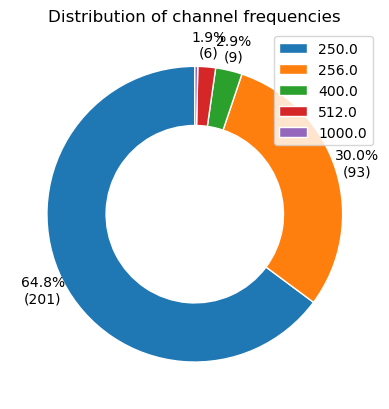

In [17]:
import matplotlib.pyplot as plt
import pyedflib
import os

sampling_frequencies = []

for root, dirs, files in os.walk('../../../../tuar/edf/'):
    for file in files:
        if file.endswith('.edf'):
            reader = pyedflib.EdfReader(os.path.join(root, file))
            sampling_frequencies.append(reader.getSampleFrequency(0))
            reader.close()

distinct_frequencies = sorted(list(set(sampling_frequencies)))
sizes = [sampling_frequencies.count(freq) for freq in distinct_frequencies]

plt.title("Distribution of channel frequencies")
wedges, _, _ = plt.pie(sizes, autopct=make_autopct(sizes, pct_threshold=1), wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=1.15, startangle=90)
plt.legend(wedges, distinct_frequencies)
plt.savefig("./output/exp_04_08_sampling_frequencies.pdf", bbox_inches='tight')
plt.show()